##
## AB test Analysis for a mobile game
### The data is pre-set for the analysis

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_csv('AB_Test_Results.csv')

In [111]:
data.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [113]:
data.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

## Data exploratory

In [114]:
data_variant = data[data.VARIANT_NAME == 'Variant']
data_control = data[data.VARIANT_NAME == 'Control']

In [115]:
import warnings

warnings.filterwarnings('ignore')

In [116]:
data.REVENUE.value_counts()

0.00     9848
1.25       10
1.01        6
3.25        6
0.04        5
         ... 
2.19        1
2.14        1
17.08       1
2.00        1
2.92        1
Name: REVENUE, Length: 101, dtype: int64

In [117]:
data.nunique()

USER_ID         6324
VARIANT_NAME       2
REVENUE          101
dtype: int64

In [118]:
data_variant_count = pd.DataFrame(data.groupby('USER_ID').agg({'VARIANT_NAME': 'nunique'}))
data_variant_count.reset_index(inplace=True)

In [119]:
data_variant_count

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
...,...,...
6319,9993,1
6320,9995,1
6321,9996,2
6322,9998,1


In [120]:
data_variant_count.VARIANT_NAME.value_counts()
# there are 1541 users who have both variants and 4783 have only one variant

1    4783
2    1541
Name: VARIANT_NAME, dtype: int64

In [121]:
data_both_group = data_variant_count[data_variant_count['VARIANT_NAME'] == 2].USER_ID.to_list()
data_single_group = data_variant_count[data_variant_count['VARIANT_NAME'] == 1].USER_ID.to_list()

In [122]:
data_both = data[data.USER_ID.isin(data_both_group)]
data_single = data[data.USER_ID.isin(data_single_group)]

In [123]:
# check if the data is correct
len(data_both) + len(data_single) == len(data)

True

### Let's look at the revenue distribution

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

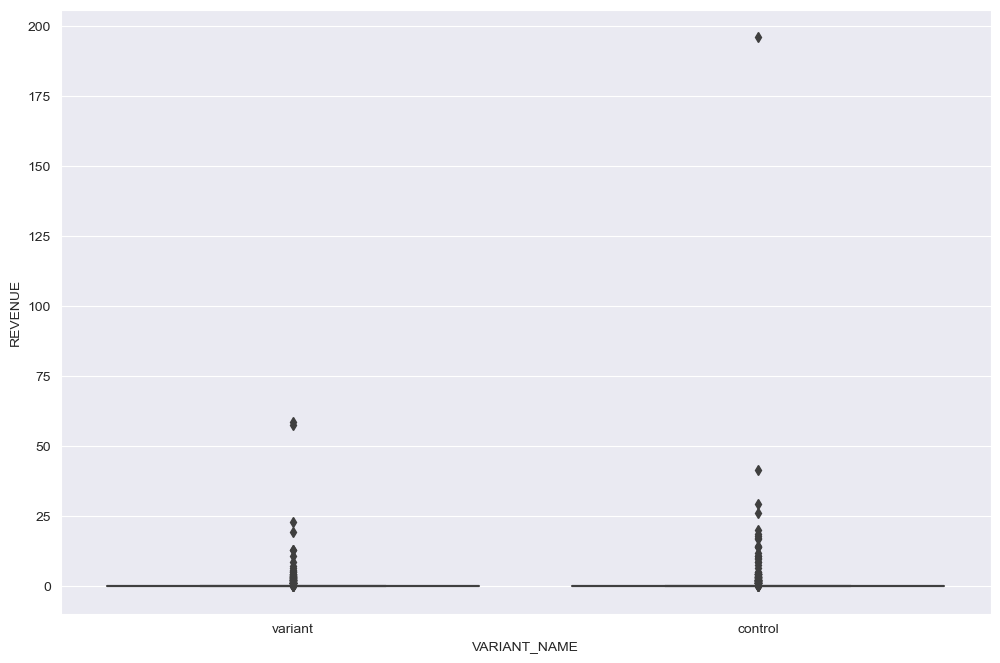

In [124]:
plt.figure(figsize=(12, 8), dpi=100)
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data)

In [125]:
## there are some outliers, let's remove them

data.REVENUE.describe()

count    10000.000000
mean         0.099447
std          2.318529
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        196.010000
Name: REVENUE, dtype: float64

In [126]:
data.sort_values(ascending=False, by='REVENUE').head(10)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
6447,2881,variant,58.63
7642,7206,variant,57.46
9421,6792,control,41.53
8168,2166,control,29.32
9125,831,control,25.98
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56


In [127]:
data[data.USER_ID == 3342]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01


In [128]:
data[data['REVENUE'] >= 30].index.to_list()

[1437, 6447, 7642, 9421]

In [129]:
# drop outliers
data.drop(data[data['REVENUE'] >= 30].index.to_list(), inplace=True)
data_single.drop(data_single[data_single['REVENUE'] >= 30].index.to_list(), inplace=True)
data_both.drop(data_both[data_both['REVENUE'] >= 30].index.to_list(), inplace=True)

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

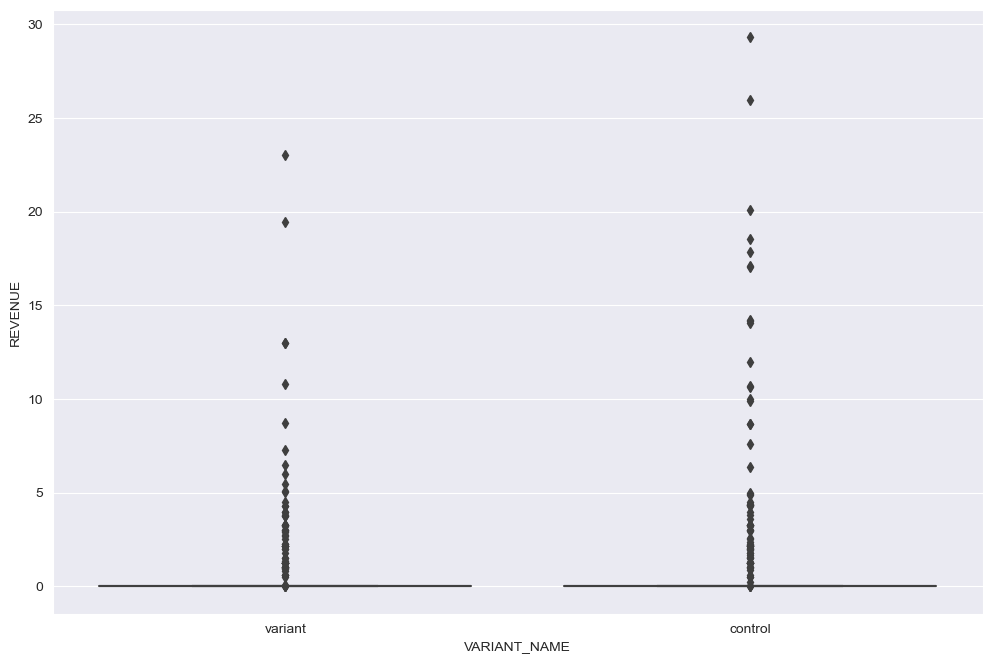

In [130]:
plt.figure(figsize=(12, 8), dpi=100)
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data)

Text(0.5, 1.0, 'Double variant users')

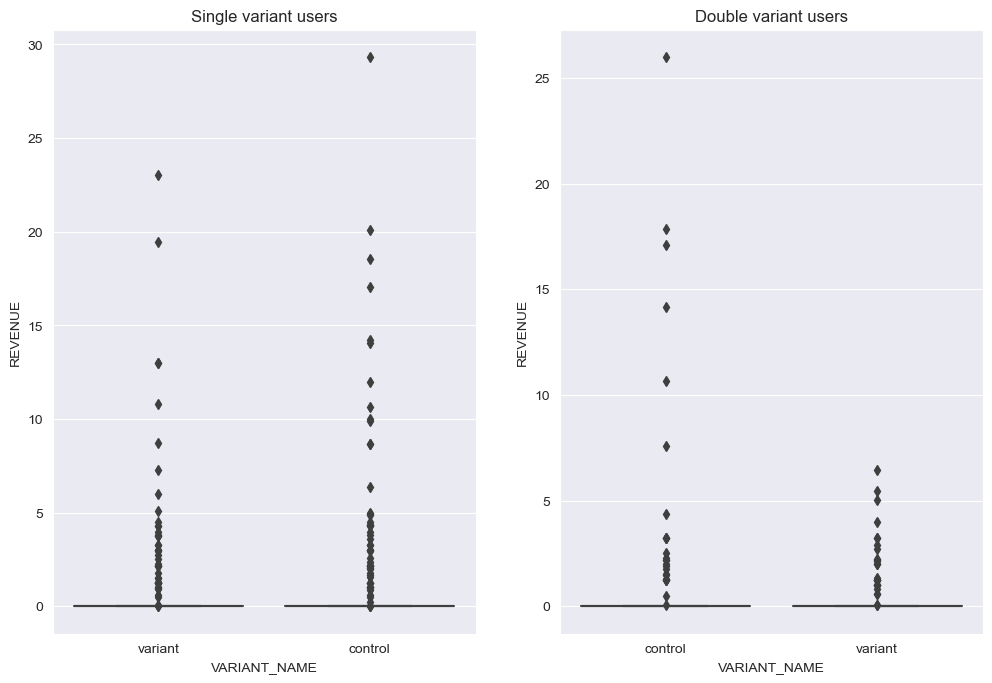

<Figure size 1200x800 with 0 Axes>

In [131]:
ax, fig = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data_single, ax=fig[0]).set_title('Single variant users')
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data_both, ax=fig[1]).set_title('Double variant users')

Text(0.5, 1.0, 'Double variant users')

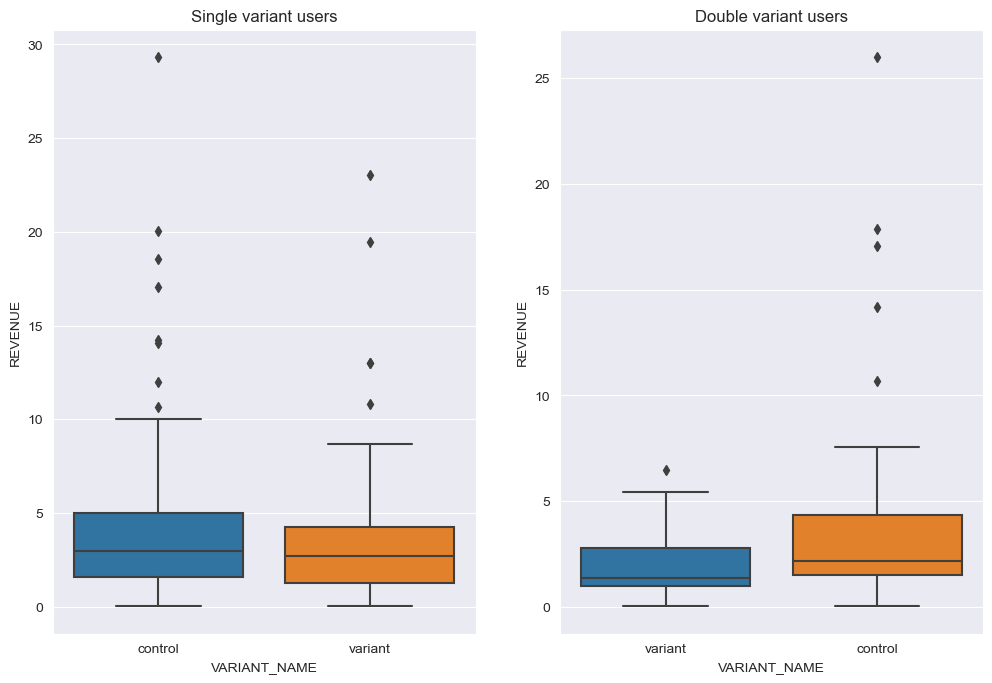

<Figure size 1200x800 with 0 Axes>

In [132]:
# exclude the users with 0 revenue

ax, fig = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data_single[data_single.REVENUE > 0],
            ax=fig[0]).set_title('Single variant users')
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data_both[data_both.REVENUE > 0],
            ax=fig[1]).set_title('Double variant users')

Text(0.5, 1.0, 'Double variant users')

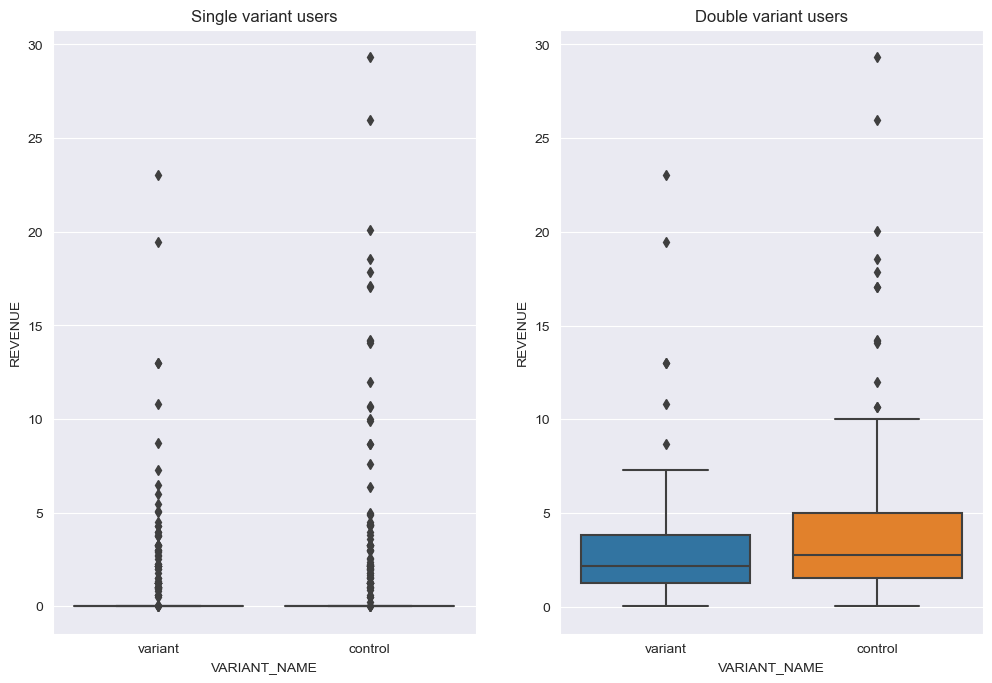

<Figure size 1200x800 with 0 Axes>

In [133]:
ax, fig = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data,
            ax=fig[0]).set_title('Single variant users')
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data[data.REVENUE > 0],
            ax=fig[1]).set_title('Double variant users')

In [134]:
data.loc[data.REVENUE != 0, 'REVENUE'].describe()

count    148.000000
mean       4.330000
std        5.339269
min        0.020000
25%        1.250000
50%        2.270000
75%        4.340000
max       29.320000
Name: REVENUE, dtype: float64

In [135]:
data_with_zero = pd.DataFrame(data.loc[(data.REVENUE == 0),].USER_ID)
data_without_zero = pd.DataFrame(data.loc[(data.REVENUE > 0),].USER_ID)

data_with_both = data_with_zero.merge(data_without_zero, how='inner', on='USER_ID')

In [136]:
(data_single.loc[
    (data['REVENUE'] == 0) & (data['USER_ID'].isin(data.loc[data['REVENUE'] > 0, 'USER_ID'].values)),
    'USER_ID'
]).count()

52

In [137]:
data_single.nunique()

USER_ID         4782
VARIANT_NAME       2
REVENUE           69
dtype: int64

In [138]:
data_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       6069 non-null   int64  
 1   VARIANT_NAME  6069 non-null   object 
 2   REVENUE       6069 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 189.7+ KB


In [139]:
data_single

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
4,6174,variant,0.0
5,2380,variant,0.0
7,9168,control,0.0
9,7548,control,0.0
...,...,...,...
9993,2400,variant,0.0
9994,3129,control,0.0
9996,502,variant,0.0
9998,7741,control,0.0


In [140]:
data_single = data_single.groupby(by=['USER_ID', 'VARIANT_NAME']).agg({'REVENUE': 'sum'}).reset_index()
data_single

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

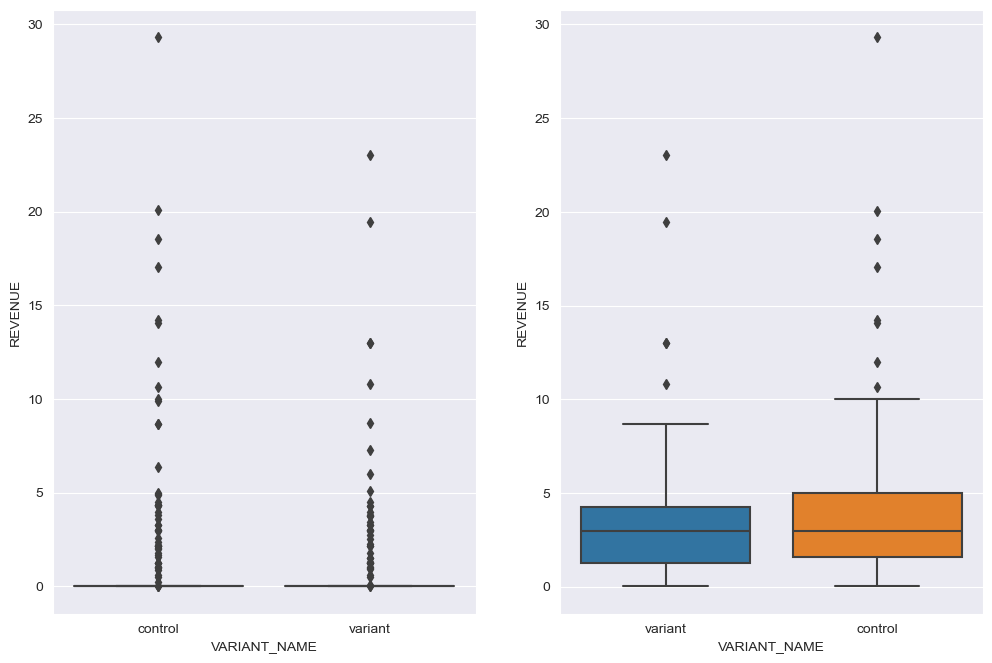

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
sns.boxplot(ax=ax[0], x='VARIANT_NAME', y='REVENUE', data=data_single)
sns.boxplot(ax=ax[1], x='VARIANT_NAME', y='REVENUE', data=data_single[data_single.REVENUE > 0])

In [142]:
all_stat = data_single.groupby(by='VARIANT_NAME').agg({'USER_ID': 'nunique',
                                                       'REVENUE': ['sum', 'mean', 'median', 'count']})

all_stat

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control         2389  274.55  0.114923    0.0  2389
variant         2393  179.32  0.074935    0.0  2393

In [143]:
orders_per_user = all_stat.loc[:, ('REVENUE', 'count')] / all_stat.loc[:, ('USER_ID', 'nunique')]
revenue_per_user = all_stat.loc[:, ('REVENUE', 'sum')] / all_stat.loc[:, ('USER_ID', 'nunique')]

In [144]:
all_stat['orders_per_user'] = orders_per_user
all_stat['revenue_per_user'] = revenue_per_user

all_stat

USER_ID REVENUE                        orders_per_user  \
             nunique     sum      mean median count                   
VARIANT_NAME                                                          
control         2389  274.55  0.114923    0.0  2389             1.0   
variant         2393  179.32  0.074935    0.0  2393             1.0   

             revenue_per_user  
                               
VARIANT_NAME                   
control              0.114923  
variant              0.074935

In [145]:
# get metrics by groups

paid_stat = data_single.loc[data_single.REVENUE != 0].groupby('VARIANT_NAME').agg({'USER_ID': 'nunique',
                                                                                   'REVENUE': ['sum', 'mean', 'median',
                                                                                               'count']})

orders_per_user = paid_stat.loc[:, ('REVENUE', 'count')] / paid_stat.loc[:, ('USER_ID', 'nunique')]
revenue_per_user = paid_stat.loc[:, ('REVENUE', 'sum')] / paid_stat.loc[:, ('USER_ID', 'nunique')]

paid_stat['orders_per_user'] = orders_per_user
paid_stat['revenue_per_user'] = revenue_per_user

In [146]:
paid_stat

USER_ID REVENUE                        orders_per_user  \
             nunique     sum      mean median count                   
VARIANT_NAME                                                          
control           53  274.55  5.180189   2.99    53             1.0   
variant           42  179.32  4.269524   2.97    42             1.0   

             revenue_per_user  
                               
VARIANT_NAME                   
control              5.180189  
variant              4.269524

In [147]:
data_single

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


`distplot` 和 `displot` 都是Seaborn库中的函数，用于绘制分布图，但它们之间存在一些关键区别：

1. **版本和功能**:
    - `distplot`: 这是Seaborn较早版本中的函数。它主要用于绘制直方图，并可以选择性地添加核密度估计(KDE)。
    - `displot`: 这是Seaborn 0.11.0中引入的新函数。它提供了更多的灵活性，允许用户绘制直方图、KDE图、ECDFs等，并支持多个子图（faceting）。

2. **返回类型**:
    - `distplot`: 返回一个matplotlib的轴对象 (`AxesSubplot`), 因此它更适合与其他matplotlib功能一起使用。
    - `displot`: 返回一个 `FacetGrid` 对象，这使得它能够更容易地处理多个子图。

3. **使用的轴**:
    - `distplot`: 通常在现有的matplotlib轴上绘制，例如通过`plt.subplots()`创建的轴。
    - `displot`: 创建自己的轴，除非你使用了`col`或`row`参数进行faceting。

4. **数据输入**:
    - `distplot`: 主要接受一维数组或Series。
    - `displot`: 更为灵活，可以接受整个DataFrame，并使用`x`和`y`参数来指定要绘制的列。

5. **在Seaborn的未来版本中**:
    - 随着Seaborn的发展，`distplot`已被弃用，并建议用户使用`displot`或其他新的分布绘图函数，如`histplot`、`kdeplot`和`ecdfplot`。

总之，虽然`distplot`和`displot`在名字上非常相似，但它们是为不同目的设计的。`displot`提供了更多的功能和灵活性，而`distplot`是一个较旧的函数，目前已经被弃用。

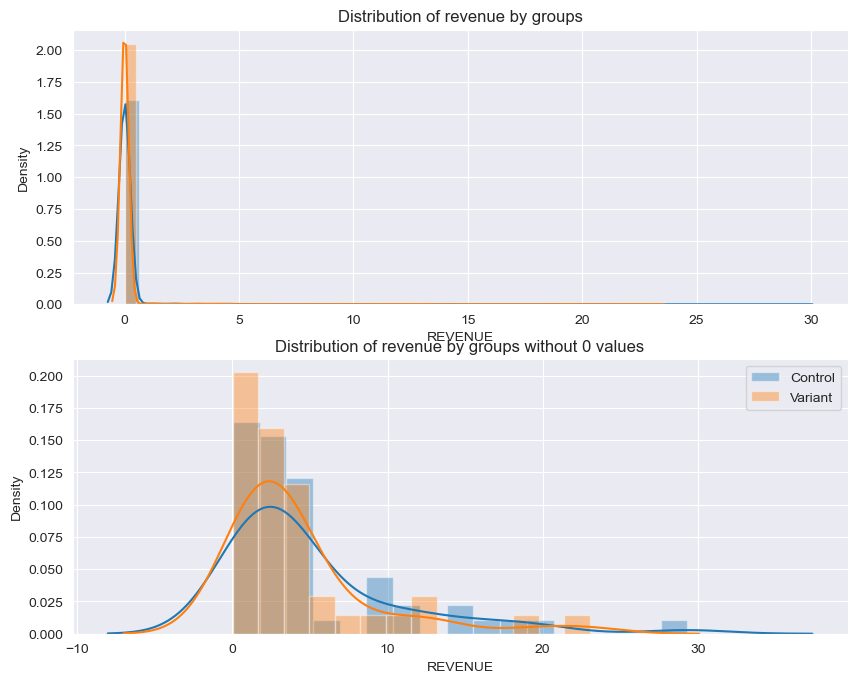

In [148]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=100)
# build graphs for all users
sns.distplot(data_single.loc[data_single['VARIANT_NAME'] == 'control', 'REVENUE'], ax=ax[0], label='Control')
sns.distplot(data_single.loc[data_single['VARIANT_NAME'] == 'variant', 'REVENUE'], ax=ax[0], label='Variant')

ax[0].set_title('Distribution of revenue by groups')

sns.distplot(data_single.loc[(data_single['VARIANT_NAME'] == 'control') & (data_single['REVENUE'] > 0), 'REVENUE'],
             ax=ax[1], label='Control')
sns.distplot(data_single.loc[(data_single['VARIANT_NAME'] == 'variant') & (data_single['REVENUE'] > 0), 'REVENUE'],
             ax=ax[1], label='Variant')

ax[1].set_title('Distribution of revenue by groups without 0 values')

plt.legend()

## Statistical analysis

We could see that the data is not normally distributed, so we will use non-parametric tests

In [149]:
# check if the data is normally distributed
from scipy.stats import shapiro

In [150]:
stat, p_value = shapiro(data_single.loc[data_single['VARIANT_NAME'] == 'control', 'REVENUE'])

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.075, p=0.000
The data is not normally distributed


In [151]:
stat, p_value = shapiro(data_single.loc[data_single['VARIANT_NAME'] == 'variant', 'REVENUE'])

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.061, p=0.000
The data is not normally distributed


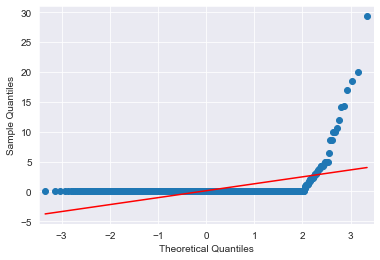

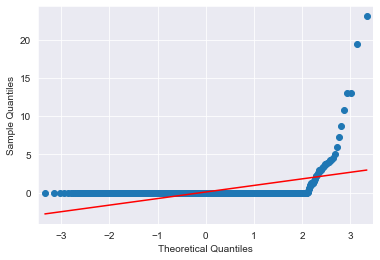

In [152]:
import statsmodels.api as sm
import pylab

sm.qqplot(data_single.loc[data_single['VARIANT_NAME'] == 'control', 'REVENUE'], line='s')
sm.qqplot(data_single.loc[data_single['VARIANT_NAME'] == 'variant', 'REVENUE'], line='s')
pylab.show()

In [153]:
# Anderson-Darling test
from scipy.stats import anderson

result = anderson(data_single.loc[data_single['VARIANT_NAME'] == 'control', 'REVENUE'])
print('Statistic: %.3f' % result.statistic)

if result.statistic > result.critical_values[2]:
    print('Probably not normally distributed')
else:
    print('Probably normally distributed')

Statistic: 874.562
Probably not normally distributed


In [154]:
result = anderson(data_single.loc[data_single['VARIANT_NAME'] == 'variant', 'REVENUE'])
print('Statistic: %.3f' % result.statistic)

if result.statistic > result.critical_values[2]:
    print('Probably not normally distributed')
else:
    print('Probably normally distributed')

Statistic: 884.698
Probably not normally distributed


### Mann-Whitney U test

In [155]:
from scipy.stats import mannwhitneyu

In [156]:
stat, p_value = mannwhitneyu(data_single.loc[data_single['VARIANT_NAME'] == 'control', 'REVENUE'],
                             data_single.loc[data_single['VARIANT_NAME'] == 'variant', 'REVENUE'])

In [157]:
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Statistics=2871768.000, p=0.248
Probably the same distribution


In [158]:
# let's check the data without 0 values

stat, p_value = mannwhitneyu(data_single.loc[(data_single['VARIANT_NAME'] == 'control') & (data_single['REVENUE'] > 0),
'REVENUE'],
                             data_single.loc[(data_single['VARIANT_NAME'] == 'variant') & (data_single['REVENUE'] > 0),
                             'REVENUE'])

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Statistics=1197.000, p=0.531
Probably the same distribution


## Bootstrap

In [159]:
# Use the bootstrap to get the confidence interval
from sklearn.utils import resample

In [160]:
# prepare bootstrap sample
control = data_single.loc[data_single['VARIANT_NAME'] == 'control', 'REVENUE']
variant = data_single.loc[data_single['VARIANT_NAME'] == 'variant', 'REVENUE']

In [161]:
## define the bootstrap

def get_bootstrap(data, n_samples=1000):
    samples = np.array([np.random.choice(data, size=len(data), replace=True) for _ in range(n_samples)])
    return samples

In [162]:
# run bootstrap

sample_control = get_bootstrap(control)
sample_variant = get_bootstrap(variant)
sample_variant_paid = get_bootstrap(data_single.loc[data_single['REVENUE'] > 0, 'REVENUE'])
sample_control_paid = get_bootstrap(data_single.loc[data_single['REVENUE'] > 0, 'REVENUE'])

In [163]:
sample_control[0:3, 0:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [164]:
sample_control_paid[0:3, 0:]

array([[1.300e+00, 2.000e-02, 4.270e+00, 2.990e+00, 3.750e+00, 2.500e+00,
        2.007e+01, 3.250e+00, 6.000e-01, 4.330e+00, 3.250e+00, 1.000e+00,
        1.000e+00, 1.856e+01, 1.510e+00, 4.330e+00, 2.990e+00, 8.660e+00,
        1.250e+00, 2.020e+00, 4.950e+00, 2.000e-02, 2.220e+00, 3.990e+00,
        6.000e-01, 3.830e+00, 2.600e+00, 1.947e+01, 9.990e+00, 9.910e+00,
        1.010e+00, 3.280e+00, 9.910e+00, 2.990e+00, 3.580e+00, 6.000e-02,
        2.170e+00, 1.300e+00, 4.000e-02, 1.510e+00, 1.299e+01, 2.600e+00,
        4.330e+00, 8.660e+00, 3.280e+00, 1.299e+01, 4.520e+00, 3.250e+00,
        1.424e+01, 6.000e-02, 2.304e+01, 4.330e+00, 2.300e-01, 8.700e+00,
        1.560e+00, 2.000e-02, 3.410e+00, 5.000e-01, 1.198e+01, 1.856e+01,
        2.300e-01, 3.280e+00, 2.220e+00, 1.230e+00, 5.800e-01, 2.300e-01,
        1.856e+01, 1.250e+00, 1.705e+01, 4.000e-02, 1.424e+01, 4.870e+00,
        4.870e+00, 2.990e+00, 1.250e+00, 2.600e+00, 2.170e+00, 1.250e+00,
        2.170e+00, 8.660e+00, 4.520e+0

Text(0.5, 0, 'Mean')

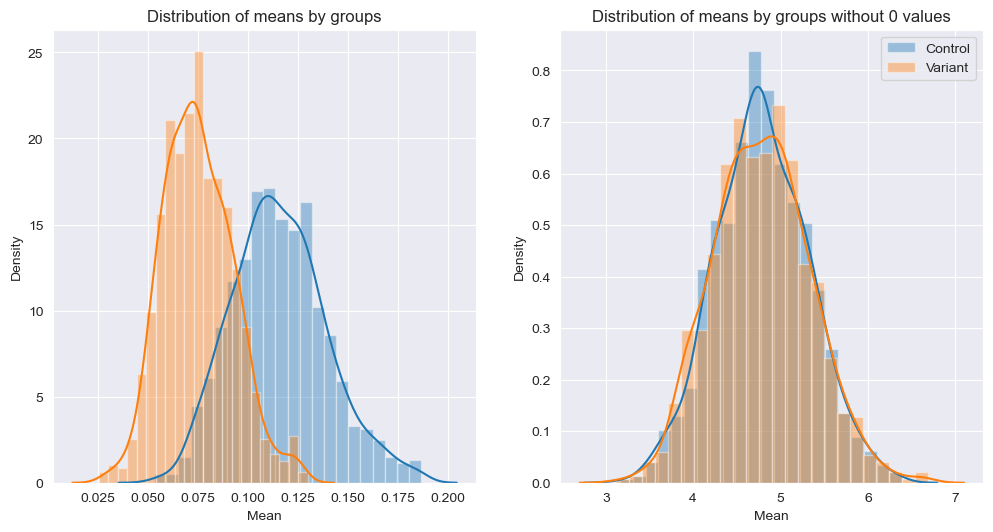

In [165]:
# plot the distribution of the means

figs, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

sns.distplot(sample_control.mean(axis=1), ax=axes[0], label='Control')
sns.distplot(sample_variant.mean(axis=1), ax=axes[0], label='Variant')

sns.distplot(sample_control_paid.mean(axis=1), ax=axes[1], label='Control')
sns.distplot(sample_variant_paid.mean(axis=1), ax=axes[1], label='Variant')

# set titles
axes[0].set_title('Distribution of means by groups')
axes[1].set_title('Distribution of means by groups without 0 values')

plt.legend()

axes[0].set_xlabel('Mean')
axes[1].set_xlabel('Mean')



In [166]:
# get the confidence interval

def get_confidence_interval(data, alpha=0.95):
    lower = np.percentile(data, (1 - alpha) / 2 * 100)
    upper = np.percentile(data, (1 + alpha) / 2 * 100)
    return lower, upper

In [167]:
# get the confidence interval for the means

lower_control, upper_control = get_confidence_interval(sample_control.mean(axis=1))
lower_variant, upper_variant = get_confidence_interval(sample_variant.mean(axis=1))

lower_control_paid, upper_control_paid = get_confidence_interval(sample_control_paid.mean(axis=1))
lower_variant_paid, upper_variant_paid = get_confidence_interval(sample_variant_paid.mean(axis=1))

In [168]:
print('Confidence interval for the control group: [{:.3f}, {:.3f}]'.format(lower_control, upper_control))
print('Confidence interval for the variant group: [{:.3f}, {:.3f}]'.format(lower_variant, upper_variant))
print('Confidence interval for the control group without 0 values: [{:.3f}, {:.3f}]'.format(lower_control_paid,
                                                                                            upper_control_paid))
print('Confidence interval for the variant group without 0 values: [{:.3f}, {:.3f}]'.format(lower_variant_paid,
                                                                                            upper_variant_paid))

Confidence interval for the control group: [0.074, 0.167]
Confidence interval for the variant group: [0.045, 0.113]
Confidence interval for the control group without 0 values: [3.757, 5.849]
Confidence interval for the variant group without 0 values: [3.807, 5.878]


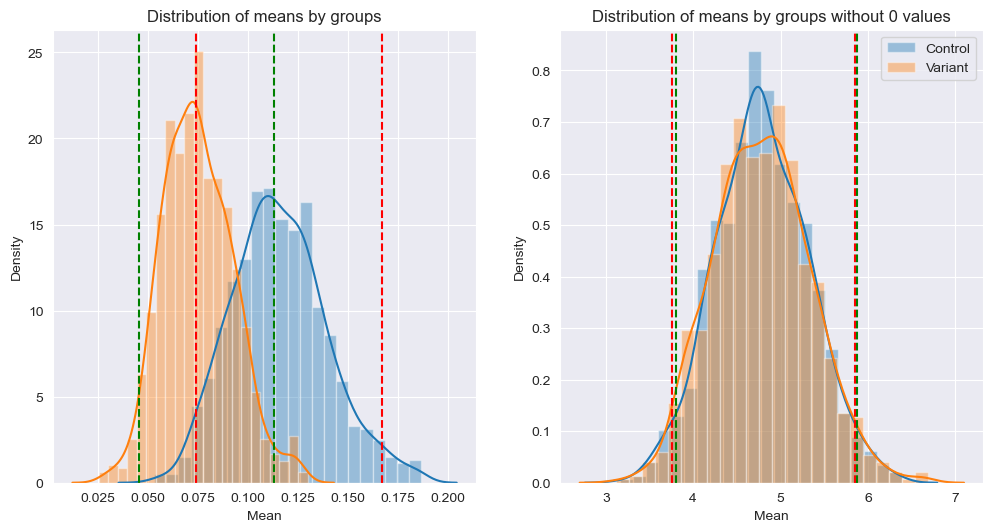

In [169]:
# plot the confidence interval for each group

figs, axes = plt.subplots(1, 2, dpi=100, figsize=(12, 6))

sns.distplot(sample_control.mean(axis=1), ax=axes[0], label='Control')
sns.distplot(sample_variant.mean(axis=1), ax=axes[0], label='Variant')

sns.distplot(sample_control_paid.mean(axis=1), ax=axes[1], label='Control')
sns.distplot(sample_variant_paid.mean(axis=1), ax=axes[1], label='Variant')

# set titles

axes[0].set_title('Distribution of means by groups')
axes[1].set_title('Distribution of means by groups without 0 values')

plt.legend()

axes[0].set_xlabel('Mean')
axes[1].set_xlabel('Mean')

# plot the confidence interval

axes[0].axvline(lower_control, color='red', linestyle='--')
axes[0].axvline(upper_control, color='red', linestyle='--')

axes[1].axvline(lower_control_paid, color='red', linestyle='--')
axes[1].axvline(upper_control_paid, color='red', linestyle='--')

axes[0].axvline(lower_variant, color='green', linestyle='--')
axes[0].axvline(upper_variant, color='green', linestyle='--')

axes[1].axvline(lower_variant_paid, color='green', linestyle='--')
axes[1].axvline(upper_variant_paid, color='green', linestyle='--')

In [170]:
# get the confidence interval for the difference between the means

diff = sample_variant.mean(axis=1) - sample_control.mean(axis=1)
diff_paid = sample_variant_paid.mean(axis=1) - sample_control_paid.mean(axis=1)

print('Confidence interval for the difference between the means: [{:.3f}, {:.3f}]'.format(*get_confidence_interval(
    diff)))
print('Confidence interval for the difference between the means without 0 values: [{:.3f}, {:.3f}]'.format(
    *get_confidence_interval(diff_paid)))


Confidence interval for the difference between the means: [-0.101, 0.016]
Confidence interval for the difference between the means without 0 values: [-1.503, 1.527]


In [171]:
# Conclusion: the difference between the means is not significant
# the difference between the means without 0 values is significant
# the variant group has higher revenue than the control group
# the variant group has higher revenue than the control group without 0 values

## T-test

In [172]:
# get the confidence interval for the difference between the means
control_bootstrap_means = [sample.mean() for sample in sample_control]
variant_bootstrap_means = [sample.mean() for sample in sample_variant]

control_bootstrap_means_paid = [sample.mean() for sample in sample_control_paid]
variant_bootstrap_means_paid = [sample.mean() for sample in sample_variant_paid]



In [173]:
# check the normality of the data

stat, p_value = shapiro(control_bootstrap_means)

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.992, p=0.000
The data is not normally distributed


In [174]:
stat, p_value = shapiro(variant_bootstrap_means)

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.991, p=0.000
The data is not normally distributed


In [175]:
stat, p_value = shapiro(control_bootstrap_means_paid)

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

stat, p_value = shapiro(variant_bootstrap_means_paid)

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

if p_value > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistics=0.999, p=0.659
The data is normally distributed
Statistics=0.997, p=0.081
The data is normally distributed


In [176]:
# According to the Shapiro-Wilk test, the data is not normally distributed, so we can't use the t-test
# we will directly calculate the t-statistic and p-value

In [177]:
# Calculate the pooled std

pooled_std = np.sqrt((np.std(control_bootstrap_means) ** 2 + np.std(variant_bootstrap_means) ** 2) / 2)
# pooled_std_1 = np.sqrt((np.var(control_bootstrap_means) + np.var(variant_bootstrap_means)) / 2)

In [178]:
pooled_std

0.020786519600928085

In [179]:
# Calculate the t-statistic

t_stat = (np.mean(control_bootstrap_means) - np.mean(variant_bootstrap_means)) / pooled_std

print(f"T-statistic: {t_stat}")

T-statistic: 1.9558450782519619


In [180]:
# Calculate the p_value

from scipy.stats import t

p_value = (1 - t.cdf(t_stat, df=len(control_bootstrap_means) + len(variant_bootstrap_means) - 2)) * 2

print('Statistics=%.3f, p=%.3f' % (t_stat, p_value))

if p_value > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Statistics=1.956, p=0.051
Probably the same distribution


In [181]:
# As for what we can get from a t-test, we can use the ttest_ind function from the scipy.stats library

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(control_bootstrap_means, variant_bootstrap_means)

print('Statistics=%.3f, p=%.3f' % (t_stat, p_value))

if p_value > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Statistics=43.712, p=0.000
Probably different distributions


In [182]:
# Calculate t-statistic
mean_diff = np.mean(variant_bootstrap_means) - np.mean(control_bootstrap_means)
t_stat = mean_diff / pooled_std

print(f"T-statistic: {t_stat}")

# Conduct t-test
t_stat, p_value = ttest_ind(control_bootstrap_means, variant_bootstrap_means)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.9558450782519619
T-statistic: 43.7121530020674, P-value: 1.8011613424506176e-293
